>I would like to begin by letting you, the grader know that this method of doing both my essay and program all through jupyter notebooks was approved by Dr. Hanson. I will be providing the context of the email in a screenshot on the assignment submission page. 

# Introduction

>For part A of the AI final project we are introduced to four types of machine learning algorithms and two unique datasets. These algorithms include; K-Nearest neighbor, decision tree classifier, Naive Bayes, and Back Propagation. The datasets we used were Iris and digits. I learned how to apply all of machine learning algorithms to the data sets through the given articles on the assignment sheet. After applying the machine learning algorithms to the Iris data sets I was able to re-use the same process and coding structure for the digits dataset. Finally I used my background knowledge from internships and other classes to apply graphs to better display my results. 

## Juypter Notebooks

> I'm sure by now you have noticed by now that this isn't going to be the typical essay with screen shots and a separate code file. I decided to use Jupyter Notebooks to complete this assignment because it is great with displaying `matplotlib` visualizations. It also allows me to keep the code and my explanations in the same place. Instead of referencing code, or screenshotting visualizations they can all be on the same page. I also know that Juypter notebooks and other variations of notebooks are used frequently in other data science and AI applications. Therefore getting to know Jupyter Notebooks could also help me in industry applications. 

In [334]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy as sp
import sklearn
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [335]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


# Part 1: Iris Data Set

## Setting up the Iris Data set
  
>First thing we need to do is set up the data set so it can be used in a classificaiton algorithm. What I did was get the data from the hard to work with iris data set and put it into a nice and usable pandas dataframe. I had to do a few steps to do this because the sepal, petal data, and the classifier were in two diffrent spots. I brought it all together in one dataframe. 

In [336]:
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Species'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## DecisionTreeClassifier: Part 1 split up the data

Here we begin with the decision tree clasifier. Im not going to do anything fancy just split the df and follow the example set by https://medium.com/@haydar_ai/learning-data-science-day-21-decision-tree-on-iris-dataset-267f3219a7fa

I had to make adjustments to the input names of the columns. Also to note I had to import the 'train_test_split' function. This function splits the data randomly inorder to split the data into testing and training data. (as the function name suggests)
  
  I am also going to record the time it takes to run inorder to compare it to the other ML algorithems 

In [337]:
dtc = DecisionTreeClassifier()
all_inputs = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values
all_classes = df['Species'].values

(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.7, random_state=1)

## DecisionTreeClassifier: Part 2 Classification Time

Now we will begin timing for the classification algorithm. This part is actually pretty easy. All that we have to do is put the proper data into the classificaion algoritem and watch it run. 

In [338]:
start = time.time()

dtc.fit(train_inputs, train_classes)
DTC_score = dtc.score(test_inputs, test_classes)

stop = time.time()

In [339]:
DTC_runtime = stop-start
print("Runtime in Seconds:", DTC_runtime)
print("Decision Tree Classifier Accuracy:", DTC_score)

Runtime in Seconds: 0.004115104675292969
Decision Tree Classifier Accuracy: 0.9555555555555556


## DecisionTreeClassifier: results
  
>Not much analysis can be done here yet. However some things to note is that the Decision Tree Classifier was extreamly accurate. More analysis will be done when we have the data from the other classifiers.

## K-Nearest Neighbors Algorithm
Reference: https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

>Moving on we will be working on the k-nearest neighbors algorithm. Add description of K-Nearest Neighbors. 

>We will be doing a very similar approach to splitting the data as the DTC. We will be using the same approach in splitting the data (Using the same function) but adding the test_size variable. This including some other slight modifications to the dataset should get us all set up. Some changes to note is that we are using a small confusion matrix to test the accuracy of the model.  

In [390]:
X_train, X_test, y_train, y_test = train_test_split(all_inputs, all_classes, test_size=0.20)

In [391]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [392]:
from sklearn.neighbors import KNeighborsClassifier

In [393]:
start = time.time()
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)
stop = time.time()
KNN_runtime = stop-start

In [394]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

In [395]:
print(confusion_matrix(y_test, y_pred))

[[ 8  0  0]
 [ 0 10  2]
 [ 0  1  9]]


In [396]:
print(classification_report(y_test, y_pred))
print("Runtime in Seconds:", KNN_runtime)
KNN_report = classification_report(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      0.83      0.87        12
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30

Runtime in Seconds: 0.0024712085723876953


## KNN Results

> The result breakdown of KNN is much more elaborate. Due to this we need to break down what the columns and rows me for their respective results. 

## Naive Bayes
Reference: https://medium.com/@awantikdas/a-comprehensive-naive-bayes-tutorial-using-scikit-learn-f6b71ae84431


  I need to restucture the DF again for this because I need the pedal and sepal data in one Dataframe and the target data in another dataframe. 

In [408]:
gnb_df = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values

In [409]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [410]:
start = time.time()
gnb.fit(gnb_df,iris.target)
stop = time.time()
GNB_runtime = stop-start

In [411]:
GaussianNB(priors=None)
gnb_score = gnb.score(gnb_df,iris.target)

## Back Propagation

Reference: https://stackabuse.com/introduction-to-neural-networks-with-scikit-learn/

In [397]:
names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

In [398]:
x = pd.DataFrame(all_inputs, columns=names)
y = pd.DataFrame(all_classes, columns=['Class'])

In [399]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [400]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [401]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)


In [402]:
start = time.time()
mlp.fit(X_train, y_train.values.ravel())
stop = time.time()


In [403]:
MPL_runtime = stop-start

In [404]:
predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))

[[ 7  0  0]
 [ 0 12  1]
 [ 0  0 10]]


In [405]:
print(classification_report(y_test,predictions))
MPL_report = classification_report(y_test,predictions)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.92      0.96        13
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



&nbsp;&nbsp;&nbsp;
&nbsp;

  

# Part 2: Digits dataset
> The digits dataset is a much larger dataset then the Iris dataset. In this dataset a matrix of numbers that represent the darkness of a pixel. If a pixels number is 0.0 it will be white, as the number goes up, for example 16.0 it will be black. The goal is to use this data in machine learning algorithms and compare how they perform to the Iris dataset. As I said, this dataset is much larger and much more complex than the Iris dataset.

In [360]:
from sklearn.preprocessing import scale
from sklearn import cluster

In [361]:
digits = datasets.load_digits()

In [362]:
pd.DataFrame(digits.data, columns=digits.feature_names)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


The following cell was taken from https://www.datacamp.com/community/tutorials/machine-learning-python inorder to get a visualization of the digits data.

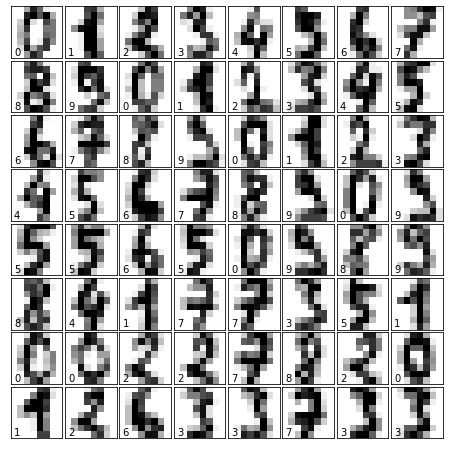

In [363]:
fig = plt.figure(figsize=(6, 6))

# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 64 images
for i in range(64):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    # Display an image at the i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))


## KNN

Reference: https://www.kaggle.com/marwaf/handwritten-digits-classification-using-knn

In [364]:
KNN_data = datasets.load_digits()

In [365]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(KNN_data.data),
KNN_data.target, test_size=0.25, random_state=42)

In [366]:
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
test_size=0.1, random_state=84)

In [367]:
print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 1212
validation data points: 135
testing data points: 450


In [368]:
kVals = range(1, 30, 2)
accuracies = []

## Finding the optimal K

This is something we didnt do in the first Kmeans problem with the Iris dataset. I had set the k=7 and it resulted with 100% accuracy. Therfor we didnt need to do a wide range of tests to find the best option. The results below show that that the ranges of k 1-15 work the best. I am going to choose k=11. Knowing now I want to use K=11 I can write a seperate cell below this to write the speed test and record that data. 

In [369]:
for k in range(1, 30, 2):
          # train the k-Nearest Neighbor classifier with the current value of `k`
          model = KNeighborsClassifier(n_neighbors=k)
          model.fit(trainData, trainLabels)
          # evaluate the model and update the accuracies list
          score = model.score(valData, valLabels)
          print("k=%d, accuracy=%.2f%%" % (k, score * 100))
          accuracies.append(score)

k=1, accuracy=99.26%
k=3, accuracy=99.26%
k=5, accuracy=99.26%
k=7, accuracy=99.26%
k=9, accuracy=99.26%
k=11, accuracy=99.26%
k=13, accuracy=99.26%
k=15, accuracy=99.26%
k=17, accuracy=98.52%
k=19, accuracy=98.52%
k=21, accuracy=97.78%
k=23, accuracy=97.04%
k=25, accuracy=97.78%
k=27, accuracy=97.04%
k=29, accuracy=97.04%


In [370]:
model = KNeighborsClassifier(n_neighbors=11)

start = time.time()
model.fit(trainData, trainLabels)
stop = time.time()
KNN_digit_runtime = stop-start

In [371]:
KNN_digit_runtime

0.0061151981353759766

In [372]:
KNN_digits_score = model.score(trainData, trainLabels)

## Decision Tree

For this I was able to simply follow simmilar steps made in the previous process of the Iris dataset. I am going to run the train test split function again and fit the training data. Much more simple then the steps needed to be taken for the KNN due to the need to find an optimal K value. I did find I needed to add the variable `shuffle=False` clause into the `train_test_split` function.

In [373]:
digits = datasets.load_digits()

In [374]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(digits.data),
KNN_data.target, test_size=0.25, shuffle=False, random_state=7)

In [375]:
model = DecisionTreeClassifier()
start = time.time()
model.fit(trainData , trainLabels)
stop = time.time()
DT_digit_runtime = stop-start

In [376]:
DST_digits_score = model.score(testData, testLabels)

## Naive Bayes

Refrence: https://medium.com/@awantikdas/a-comprehensive-naive-bayes-tutorial-using-scikit-learn-f6b71ae84431

In [377]:
ddata = digits.data

In [378]:
start = time.time()
gnb.fit(ddata,digits.target)
stop = time.time()
GNB_digits_runtime = stop-start

In [379]:
GaussianNB(priors=None)
GNB_digits_score = gnb.score(ddata,digits.target)

## Back Propagation


Reference: https://stackabuse.com/introduction-to-neural-networks-with-scikit-learn/

In [412]:
x = pd.DataFrame(digits.data)
y = pd.DataFrame(digits.target)

In [413]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [414]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [415]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [416]:
start = time.time()
mlp.fit(X_train, y_train.values.ravel())
stop = time.time()

In [417]:
MPL_digits_runtime = stop-start

In [418]:
predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))

[[39  0  0  0  0  0  0  0  0  0]
 [ 0 44  1  0  1  0  0  0  0  0]
 [ 0  0 34  1  0  0  0  0  2  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 31  0  0  0  0  0]
 [ 0  0  0  1  0 29  0  0  0  1]
 [ 0  1  0  0  1  0 38  0  0  0]
 [ 0  0  0  0  0  0  0 26  0  0]
 [ 0  0  0  0  1  0  0  0 29  1]
 [ 0  0  0  1  0  0  0  0  1 43]]


In [419]:
print(classification_report(y_test,predictions))
mlp_digits_score = classification_report(y_test,predictions)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.98      0.96      0.97        46
           2       0.97      0.92      0.94        37
           3       0.92      0.97      0.94        34
           4       0.91      1.00      0.95        31
           5       0.97      0.94      0.95        31
           6       1.00      0.95      0.97        40
           7       1.00      1.00      1.00        26
           8       0.91      0.94      0.92        31
           9       0.96      0.96      0.96        45

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [421]:
# Iris Dataset Runtimes
DTC_runtime
KNN_runtime
GNB_runtime
MPL_runtime

# Digit Dataset Runtimes
KNN_digit_runtime
DT_digit_runtime
GNB_digits_runtime
MPL_digits_runtime

# Iris Accuracy results
DTC_score
KNN_report #KNN
gnb_score
MPL_report #Back Propagation

# Digit Accuracy results
KNN_digits_score
DST_digits_score
GNB_digits_score
mlp_digits_score
print()

Ref: https://python-graph-gallery.com/11-grouped-barplot/

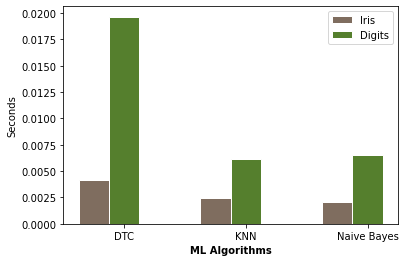

In [449]:
barWidth = 0.25

Iris_runtime = [DTC_runtime, KNN_runtime, GNB_runtime]
Digit_runtime = [DT_digit_runtime, KNN_digit_runtime, GNB_digits_runtime]

r1 = np.arange(len(Iris_runtime))
r2 = [x + barWidth for x in r1]


plt.bar(r1, Iris_runtime, color='#7f6d5f', width=barWidth, edgecolor='white', label='Iris')
plt.bar(r2, Digit_runtime, color='#557f2d', width=barWidth, edgecolor='white', label='Digits')

plt.xlabel('ML Algorithms', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(Iris_runtime))], ['DTC', 'KNN', 'Naive Bayes'])
plt.ylabel('Seconds')

plt.legend()


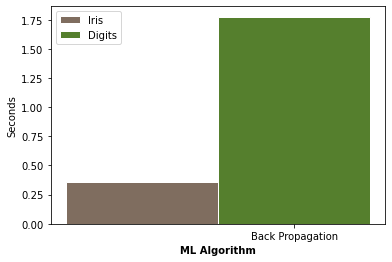

In [450]:
r1 = np.arange(1)
r2 = [x + barWidth for x in r1]
plt.bar(r1, [MPL_runtime], color='#7f6d5f', width=barWidth, edgecolor='white', label='Iris')
plt.bar(r2, [MPL_digits_runtime], color='#557f2d', width=barWidth, edgecolor='white', label='Digits')
plt.xlabel('ML Algorithm', fontweight='bold')
plt.xticks([r + barWidth for r in range(1)], ['Back Propagation'])
plt.ylabel('Seconds')

plt.legend()

## Runtime results

> As visualized above, In brown you can see the operations done from each ML algorithm on the Iris data set. In the green bar you can see each ML algorithms performance on the digits dataset. It is clear that all of the algorithms ran much more efficiently on the Iris data set. This is because that dataset is significantly smaller. Also I had to separate the Back Propagation algorithm (MLP) from the others. This is because it took significantly longer to run then the rest of the algorithms. 

In [445]:
print("DTC Score:",DTC_score,"\n\n")
print("KNN Report:\n",KNN_report,'\n\n') #KNN
print("GNB Score:",gnb_score, '\n\n')
print("MLP Report:\n",MPL_report,'\n\n') #Back Propagation

DTC Score: 0.9555555555555556 


KNN Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      0.83      0.87        12
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30
 


GNB Score: 0.96 


MLP Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.92      0.96        13
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30
 




In [446]:
print("KNN Score:",KNN_digits_score)
print("DST Score:",DST_digits_score)
print("GNB Score:",GNB_digits_score)
print("MLP Report:\n\n",mlp_digits_score)

KNN Score: 0.9818481848184818
DST Score: 0.7622222222222222
GNB Score: 0.8580968280467446
MLP Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.98      0.96      0.97        46
           2       0.97      0.92      0.94        37
           3       0.92      0.97      0.94        34
           4       0.91      1.00      0.95        31
           5       0.97      0.94      0.95        31
           6       1.00      0.95      0.97        40
           7       1.00      1.00      1.00        26
           8       0.91      0.94      0.92        31
           9       0.96      0.96      0.96        45

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



## Score and Report 

> Now this is a bit of a mess. We have data in scores and reports. Inorder to compare the results of the algorithms accuracy we need to find the common datapoint between the scores and reports. In this case the score results and the f1 accuracy match up to be the same output of data. Therefore we need to do some manual picking of the data in order to visualize this data and see how they match up against each other. 

In [451]:
# Manual Addition of variables from results
MLP_digits_acc = 0.96
MLP_iris_acc = 0.97
KNN_iris_acc = 0.90

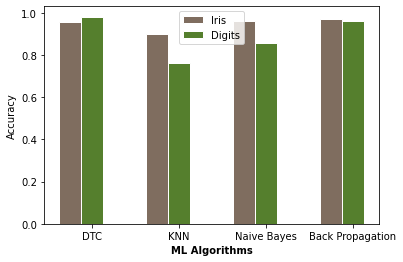

In [455]:
barWidth = 0.25

Iris_acc = [DTC_score, KNN_iris_acc, gnb_score, MLP_iris_acc]
Digit_acc = [KNN_digits_score, DST_digits_score, GNB_digits_score, MLP_digits_acc]

r1 = np.arange(len(Iris_acc))
r2 = [x + barWidth for x in r1]


plt.bar(r1, Iris_acc, color='#7f6d5f', width=barWidth, edgecolor='white', label='Iris')
plt.bar(r2, Digit_acc, color='#557f2d', width=barWidth, edgecolor='white', label='Digits')

plt.xlabel('ML Algorithms', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(Iris_acc))], ['DTC', 'KNN', 'Naive Bayes', 'Back Propagation'])
plt.ylabel('Accuracy')

plt.legend()

## Accuracy results

> This graph helps us see all of the algorithms in line and their performances when it comes to their accuracy to each dataset. Both Back Propagation and the decision tree classifier algorithms were extremely accurate in both cases. I was surprised to find that the K-Nearest neighbor did the poorest of all the algorithms when it comes to the iris dataset. This is because, when plotted out the data points seemed distinct enough for the algorithm to recognize the species. However I am not surprised that it did poorly when it came to the digits dataset. Another interesting point is that in the decision tree classifier score of the digits data set was higher then the Iris dataset. I was surprised by this because the digits dataset is much more complex and from my readings decision tree classifiers don't perform as well when the classification dataset grows more and more complex. 

## Which classification learning algorithm performed best?

> The decision tree classifier algorithm performed the best overall. It proved to be the most accurate when it came to the difficult digits classification and scored 95% accuracy on the iris dataset. When it came to computation it was slower than NKK and Naive Bayes but not by much. When factoring in both the speed and accuracy the decision tree classifier stood out as the most overall effective algorithm.